# Visualisations 

In [2]:
import math
from typing import List

import scipy
import scipy.sparse
from sklearn.neighbors import NearestNeighbors
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

### Kernel Visualisation

In [4]:
# KERNELS
def rbf(distance, variance):
    return math.exp(- (distance**2) / (2 * variance))

def laplacian(distance,variance):
    return math.exp(- (distance) / (math.sqrt(variance)))



def sigmoid_kernel(x, y, gamma: float = 1.0, coef0: float = 0.0) -> float:
    # Needs γ and c inside 'nice' ranges to stay in the valid kernel regime.
    x, y = np.asarray(x), np.asarray(y)
    return math.tanh(gamma * float(np.dot(x, y)) + coef0)

def chi2(distance, gamma):
    # Implemented using distance instead of vectors
    return math.exp(-gamma * distance)


# need to access the actual neighbours for these below

# Cosine 
# Polynomial

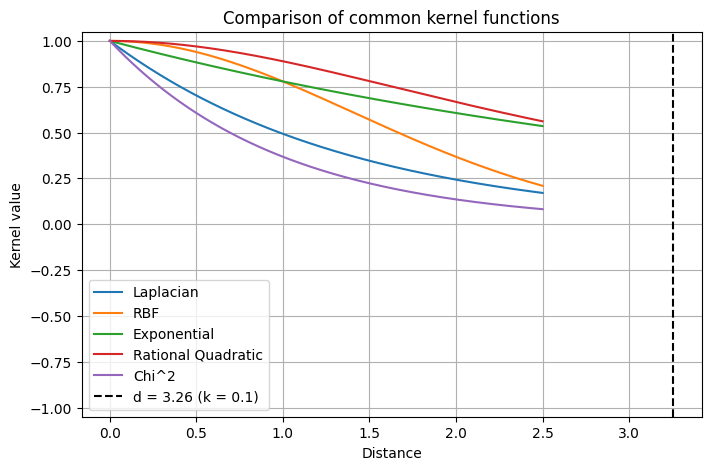

In [16]:
# Distances
d = np.linspace(0.0, 2.5, 500)
# Variance
variance = 2.0          
# alpha     = 1.0           # Rational Quadratic shape
# length_sq = 1.0           # Rational Quadratic ℓ²
# gamma     = 1.0           # chi sq
alpha = 1.0

# Radial kernels
rbf = np.exp(- (d**2) / (2 * variance))
laplacian_vals = np.exp(-d / math.sqrt(variance))
exponential_vals = np.exp(-d / (2 * variance))


rational_quadratic = 1 / (1 + (d**2 / (2 * alpha * variance**2)))
# rq_vals        = (1 + d**2 / 2.0)**-1       # alpha = 1, ℓ = 1
chi2_vals      = np.exp(-d)                 # γ = 1, using χ² distance = d

# Map Euclidean distance → dot product for unit-norm vectors
dot = 1 - d**2 / 2.0                        # ⟨x,y⟩ = cos θ
# sigmoid_vals = np.tanh(dot)                 # γ = 1, c = 0
# cosine_vals  = dot                          # cosine similarity itself

# valid = dot >= -1.0                                # keep sigmoid/cosine valid
# sigmoid_vals = np.where(valid, np.tanh(dot), np.nan)
# cosine_vals  = np.where(valid, dot,       np.nan)



# Plot everything together
plt.figure(figsize=(8, 5))
plt.plot(d, laplacian_vals, label='Laplacian')
plt.plot(d, rbf, label='RBF')
plt.plot(d, exponential_vals, label ='Exponential' )
plt.plot(d, rational_quadratic, label='Rational Quadratic')
plt.plot(d, chi2_vals, label='Chi^2')
# plt.plot(d, sigmoid_vals, label='Sigmoid (tanh)')
# plt.plot(d, cosine_vals, label='Cosine similarity')

# Plot line where laplacian reaches 0.1 since it is the fastest decaying kernel (most of the times)
threshold_val = 0.1
target_d = -math.log(threshold_val) * math.sqrt(variance)


plt.axvline(target_d, linestyle='--', color='k',
            label=f'd = {target_d:.2f} (k = {threshold_val})')

plt.xlabel('Distance')
plt.ylabel('Kernel value')
plt.title('Comparison of common kernel functions')
plt.ylim(-1.05, 1.05)
plt.legend()
plt.grid(True)
plt.show()

#### RBF Kernel with different variances

In [21]:
# Read csvs of experiments with rbf kernel into pd dataframe
fcn_rbf_20 = pd.read_csv("results/bsds/csv_results/01_FCN_rbf.csv")
fcn_rbf_50 = pd.read_csv("results/bsds/csv_results/01_1_FCN_rbf.csv")
fcn_rbf_100 = pd.read_csv("results/bsds/csv_results/01_2_FCN_rbf.csv")
# fcn_rbf_10 = pd.read_csv("results/bsds/csv_results/01_3_FCN_rbf.csv")



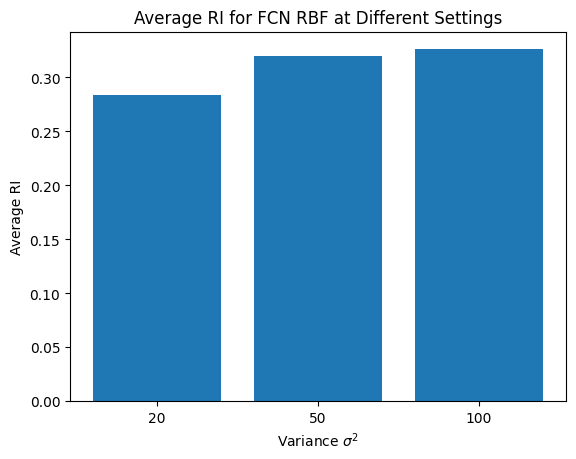

In [27]:
# Plot average ri per variance value
average = {
    # '10':  fcn_rbf_10['ri'].mean(),
    '20':  fcn_rbf_20['ri'].mean(),
    '50':  fcn_rbf_50['ri'].mean(),
    '100': fcn_rbf_100['ri'].mean(),
}

plt.figure()
plt.bar(average.keys(), average.values())
plt.xlabel('Variance $\sigma ^2$')
plt.ylabel('Average RI')
plt.title('Average RI for FCN RBF at Different Settings')
plt.show()


/var/folders/nh/lvxv45rj4f5f_dz9b82bb5_h0000gn/T/ipykernel_76495/4085632185.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(values, labels=labels, showfliers=False)


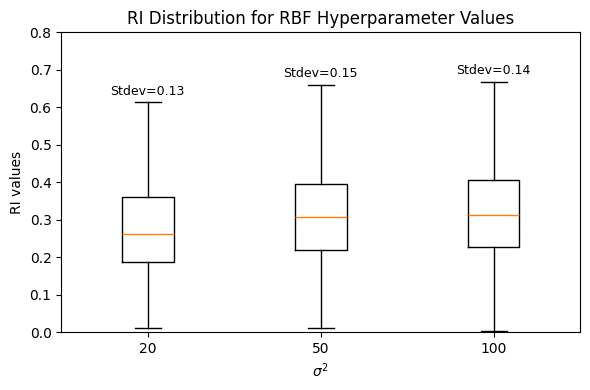

In [33]:
paths = {
    # '10':  "results/bsds/csv_results/01_3_FCN_rbf.csv",
    '20':  "results/bsds/csv_results/01_FCN_rbf.csv",
    '50':  "results/bsds/csv_results/01_1_FCN_rbf.csv",
    '100': "results/bsds/csv_results/01_2_FCN_rbf.csv",
}
RI_values = {label: pd.read_csv(path)['ri'] for label, path in paths.items()}
# variances = {label: series.var(ddof=1) for label, series in RI_values.items()}
stdevs = {lbl: series.std(ddof=1) for lbl, series in RI_values.items()}
labels = list(RI_values.keys())
values = [RI_values[label] for label in labels]
fig, ax = plt.subplots(figsize=(6,4))
bp = ax.boxplot(values, labels=labels, showfliers=False)
# add variance to box plors 
for i, label in enumerate(labels, start=1):
    var = stdevs[label]
    # place the text just above the upper whisker not working
    whisker_y = bp['whiskers'][2*(i-1)+1].get_ydata()[1]
    ax.text(i, whisker_y * 1.02, f"Stdev={var:.2f}", 
            ha='center', va='bottom', fontsize=9)
ax.set_xlabel('$\sigma ^2$')
ax.set_ylabel('ARI values')
plt.ylim(0.0, 0.8)
ax.set_title('ARI Distribution for RBF Hyperparameter Values')
plt.tight_layout()
plt.show()

#### Performance for all experiments

#### Comparison for different kernels fully conn for all experiments